<a href="https://colab.research.google.com/github/anshu57/Netflix-Movies-and-TV-shows-Clustering-Unsupervised-Machine-Learning/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Unsupervised ML (Netflix Movies and TV shows Clustering) /netflix_titles (1).csv')

In [ ]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Exploratory Data Analysis

##Basic Data Inspection

In [ ]:
dataset.shape

(8807, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
#Checking for duplicates
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

##Handling missing Values

In [ ]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Calculating the percentage of NULL of values in each column
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/6234).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,2634,42.252166
country,831,13.330125
cast,825,13.233879
date_added,10,0.160411
rating,4,0.064164
duration,3,0.048123
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


Director contains 42% null values we cannot remove these, cast countries and date_added contains significant no. of null values.

In [ ]:
#Replaing null values in 'director' column with value 'No data'
dataset['director'].replace(np.nan, 'No data',inplace  = True)

In [ ]:
#Replacing null values in cast column with 'No data'
dataset['cast'].replace(np.nan, 'No data',inplace  = True)

In [ ]:
#Replacing null values in country column with most frequent country i.e mode
dataset['country'].replace(np.nan, dataset['country'].mode()[0],inplace  = True)

In [ ]:
# Dropping the null values in date,rating and duration columns
dataset.dropna(inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [ ]:
#Change object variable to datetime
dataset["date_added"]=pd.to_datetime(dataset["date_added"])
#Extracting year from the date and creating a new variable
dataset["year_added"] = dataset["date_added"].dt.year
# Droping the 'date_added' Variable
dataset.drop('date_added',axis=1,inplace=True)

##Univariate Analysis

### Analysing type of content of Netflix

In [ ]:
# For viz: Ratio of Movies & TV shows

x=dataset.groupby(['type'])['type'].count()
y=len(dataset)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

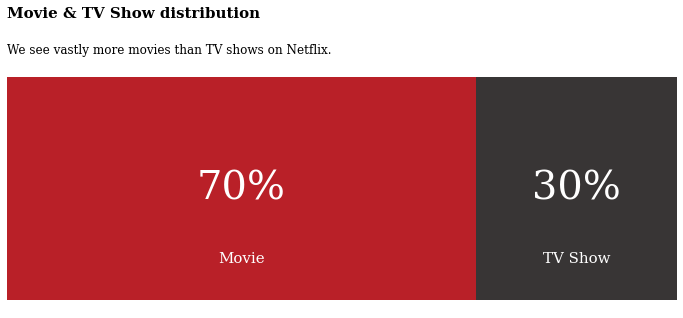

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12, 4.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

### Count of content, Country Wise

In [ ]:
def countplot_v(x,order,x_label,title):
  plt.figure(figsize=(10,6))

  # Plotting the values in dependent variable
  ax=sns.countplot(x=x, data=dataset,order = order.value_counts().index[:10],palette="viridis")
  #Annotate the bars with their values
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12,color='#607B8B',xytext=(0, 8),textcoords='offset points')

  ax.set(xlabel=x_label, ylabel = "")
  plt.title(title)


  plt.show()

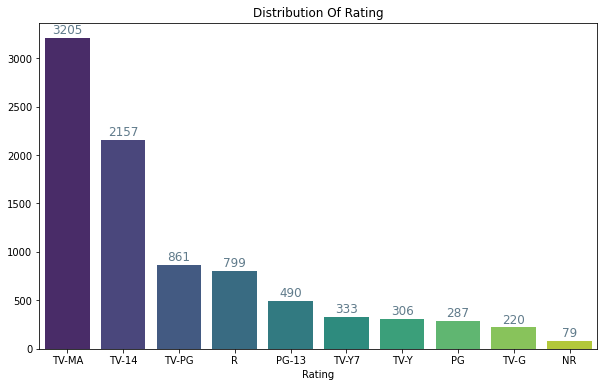

In [ ]:
countplot_v("rating",dataset['rating'],"Rating",'Distribution Of Rating')

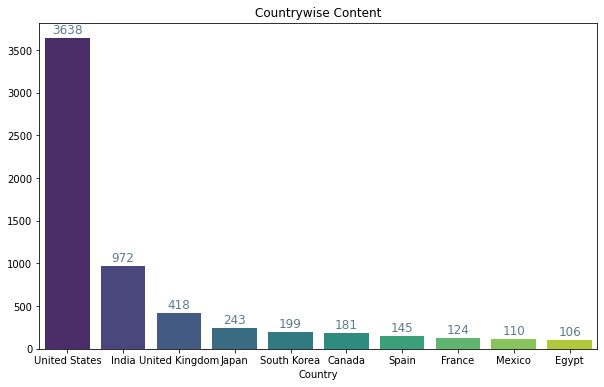

In [ ]:
countplot_v("country",dataset['country'],"Country",'Countrywise Content')

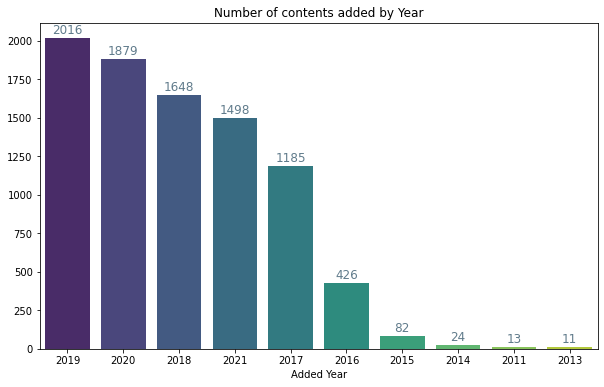

In [ ]:
countplot_v("year_added",dataset['year_added'],"Added Year",'Number of contents added by Year')

In [ ]:
# Create a list of years when content was added
years = list(range(2008,2022,1))
# Seperate Rows having only movies as content
movie_rows=dataset.loc[dataset["type"] == "Movie"]
# Seperate Rows having only TV Shows as content
tv_rows=dataset.loc[dataset["type"]=="TV Show"]

movies_counts = movie_rows.year_added.value_counts()
tv_counts = tv_rows.year_added.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

Text(0.5, 1.0, 'Movies/TV Shows Released per Year')

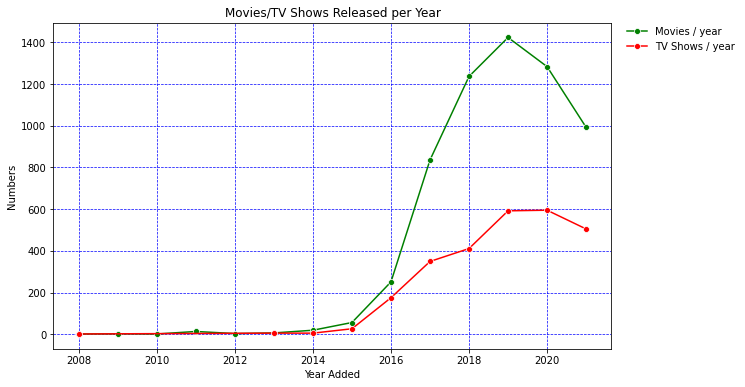

In [ ]:
# Create a line plot
plt.figure(figsize=(10,6))

sns.lineplot(data=movies, color="green",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="red",  label="TV Shows / year",marker='o')

# Draw grid lines with blue color and dashed style
plt.grid(color='blue', linestyle='--', linewidth=0.7)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.xlabel("Year Added")
plt.ylabel("Numbers")
plt.title('Movies/TV Shows Released per Year')

In [ ]:
dataset['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#Function to populate values for 'appropriate_For' feature
def APPROPRIATE_FOR_WHOM (rating):
  appropriate_For = ''
  if (rating== 'TV-MA' or rating== 'NR' or rating=='NC-17' or rating=='UR'):
    appropriate_For= 'Adults Only'
  elif (rating== 'R' or rating== 'PG-13' or rating== 'TV-14'):
    appropriate_For= 'Teenage'
  elif (rating=='TV-Y7' or rating=='TV-Y7-FV' or rating== 'PG' or rating== 'TV-PG'):
    appropriate_For= 'Kid_7_to_13'
  else:
    appropriate_For= 'Kids'

  return appropriate_For

In [ ]:
#FEATURE ENGINEERING #Creating new column 'appropriate_For'
dataset['appropriate_For'] = dataset.apply(lambda x: APPROPRIATE_FOR_WHOM(x['rating']), axis=1)

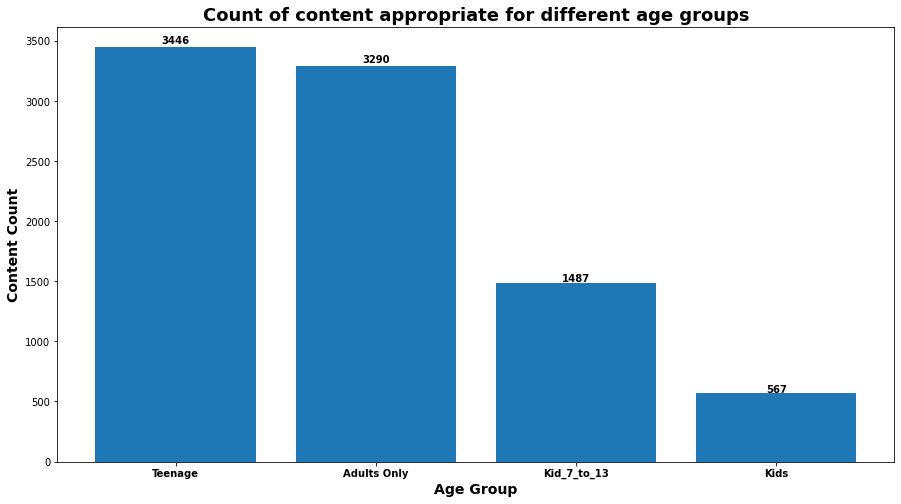

In [ ]:
#Count of content appropriate for defferent age groups
data= dataset.groupby('appropriate_For')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,8))
graph = plt.bar(data['appropriate_For'], data['show_id'])

plt.title('Count of content appropriate for different age groups', weight='bold', fontsize= 18)
plt.xlabel('Age Group', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['appropriate_For'], weight= 'bold', fontsize= 10)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

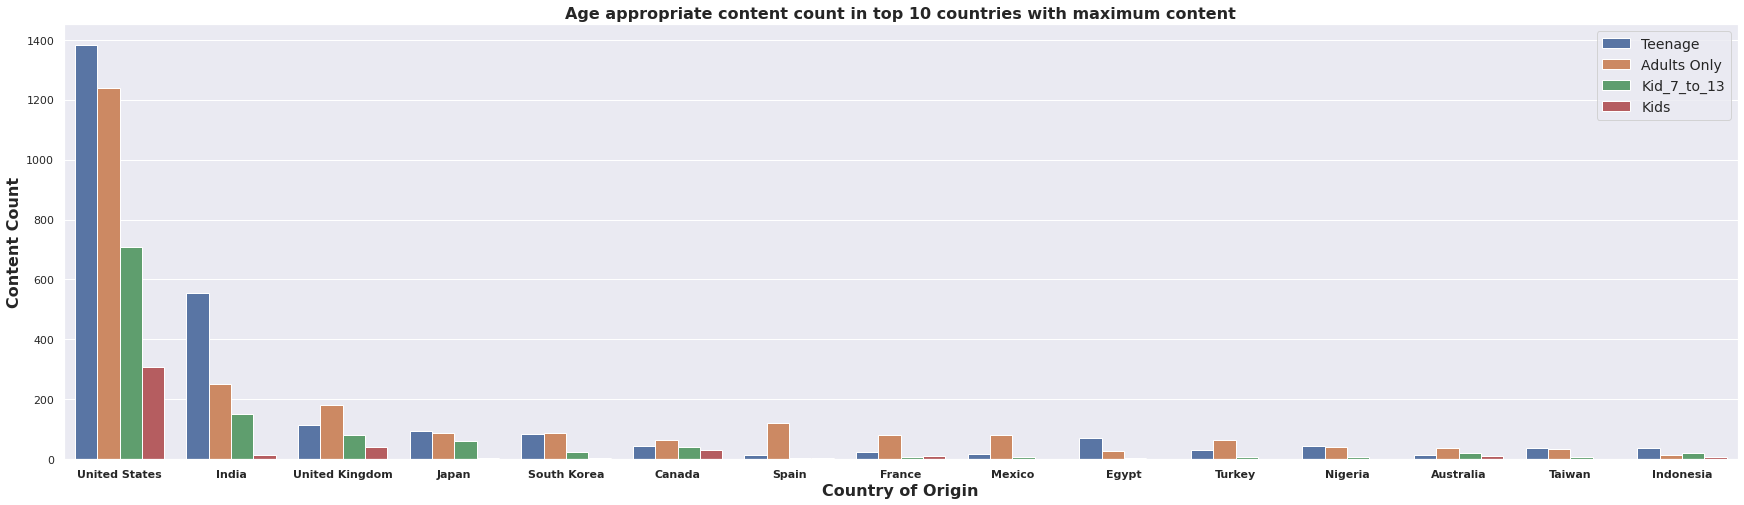

In [ ]:
#Proportion of age-wise content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(30,8))
ax=sns.countplot(x="country",data= dataset,hue= "appropriate_For",order = dataset['country'].value_counts().index[0:15])
plt.xticks(weight='bold')
plt.xlabel('Country of Origin', weight='bold', fontsize=16)
plt.ylabel('Content Count', weight='bold', fontsize=16)
plt.title("Age appropriate content count in top 10 countries with maximum content", weight='bold', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.show()

In [ ]:
#Getting Movies and TV show records in seperate dataframes
movies_df= dataset[dataset['type']=='Movie']
tvshow_df= dataset[dataset['type']=='TV Show']

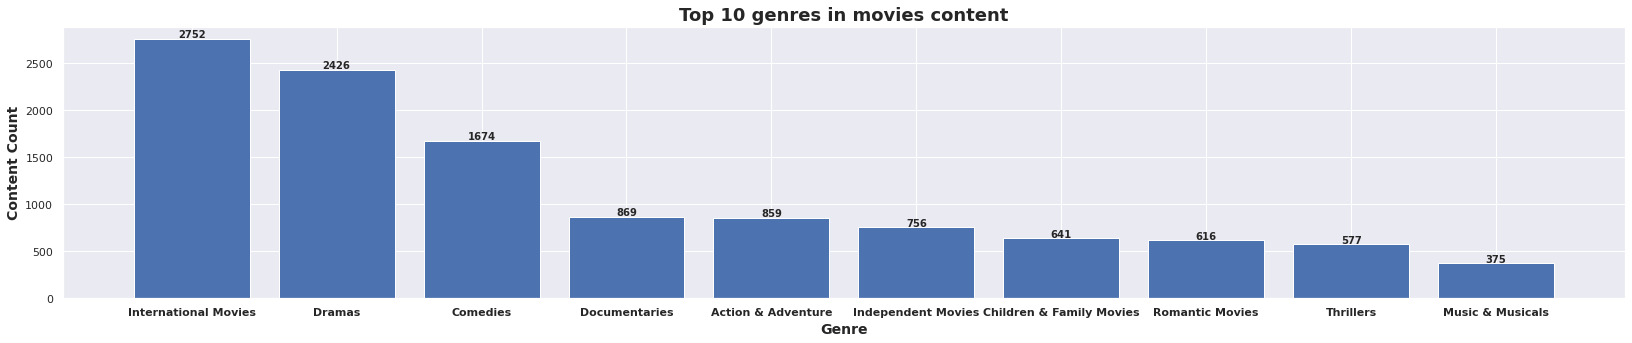

In [ ]:
#Top 10 genres in TV shows content
movies_genre_dict= {' ':0}
movies_genre_list= list(movies_df['listed_in'])
import pdb

for item in movies_genre_list:
  #pdb.set_trace()
  flag= 3
  item= item.split(', ')
  for i in item:
    if i in movies_genre_dict.keys():
      movies_genre_dict[i]= movies_genre_dict[i]+1
    else:
      movies_genre_dict[i]= 1
movies_genre_df= pd.DataFrame(movies_genre_dict.items(), columns=['Genre', 'Count'])
data= movies_genre_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(28,5))
graph = plt.bar(data['Genre'], data['Count'])

plt.title('Top 10 genres in movies content', weight='bold', fontsize= 18)
plt.xlabel('Genre', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['Genre'], weight='bold')
labels= []
for item in data['Count']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

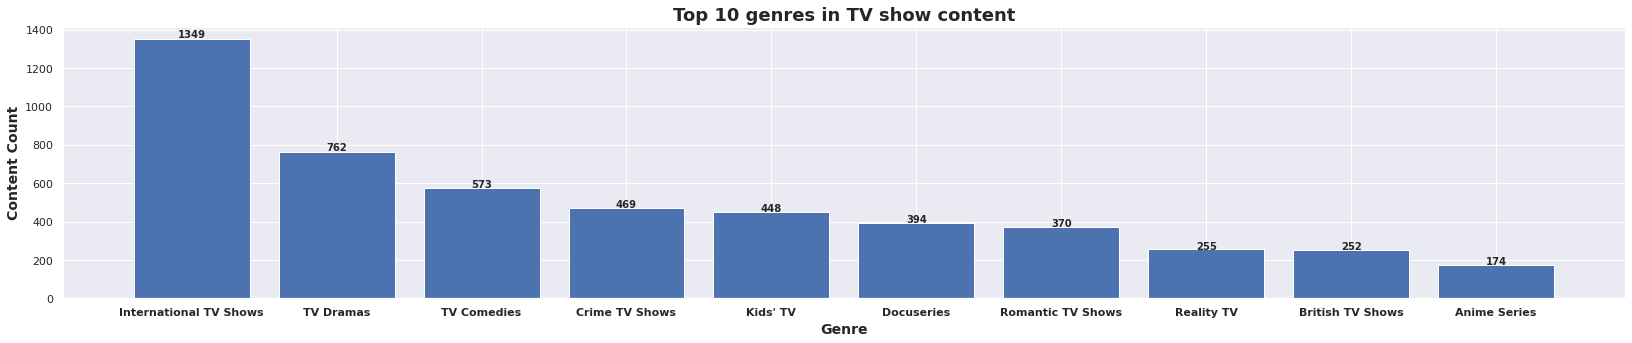

In [ ]:
#Top 10 genres in TV shows content
tvshow_genre_dict= {' ':0}
tvshow_genre_list= list(tvshow_df['listed_in'])
import pdb

for item in tvshow_genre_list:
  #pdb.set_trace()
  flag= 3
  item= item.split(', ')
  for i in item:
    if i in tvshow_genre_dict.keys():
      tvshow_genre_dict[i]= tvshow_genre_dict[i]+1
    else:
      tvshow_genre_dict[i]= 1
tvshow_genre_df= pd.DataFrame(tvshow_genre_dict.items(), columns=['Genre', 'Count'])
data= tvshow_genre_df.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(28,5))
graph = plt.bar(data['Genre'], data['Count'])

plt.title('Top 10 genres in TV show content', weight='bold', fontsize= 18)
plt.xlabel('Genre', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['Genre'], weight='bold')
labels= []
for item in data['Count']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

In [ ]:
tvshow_df['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

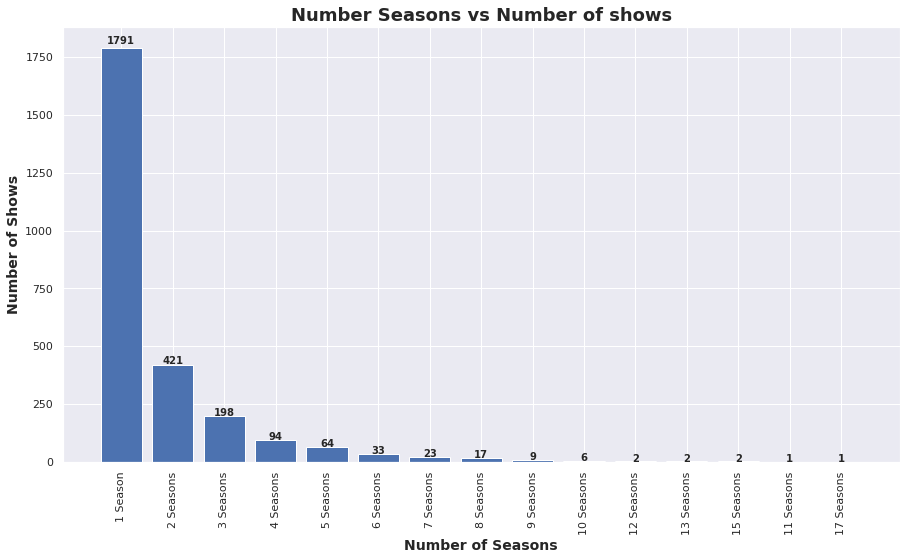

In [ ]:
#Number Seasons vs Number of shows
data= tvshow_df.groupby('duration')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,8))
graph = plt.bar(data['duration'], data['show_id'])

plt.title('Number Seasons vs Number of shows', weight='bold', fontsize= 18)
plt.xlabel('Number of Seasons', weight='bold', fontsize= 14)
plt.ylabel('Number of Shows', weight='bold', fontsize= 14)
plt.xticks(data['duration'], rotation=90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1